## <span style="color:white"> __Introduction__ </span>

Welcome to the documentation of my work for this EDA project where I do some exploratory data analysis for my fictitious client, Jacob Phillips and present him with my recomendations 

First from the database, in the Schema EDA, there were 2 tables. king_county_house_details and king_county_house_sales. For the purpose of getting relavant data (which can be found in column_names.md) I performed a left join usind the following SQL Query



After this query I have exportred the data to a .csv file

## Understanding the Data

First we load the data from the .csv file onto a pandas dataframe

In [1]:
import pandas as pd
kcdf = pd.read_csv("data/King_County_House_prices_dataset.csv")
kcdf.head()

,id,datedate,priceprice,bedroomsnumber,bathroomsnumber,sqft_livingsquare,sqft_lotsquare,floorstotal,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,...,7,1180.0,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,7,2170.0,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,6,770.0,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,7,1050.0,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,8,1680.0,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0


### Column Names and descriptions for King County Data Set

- **id** - unique identified for a house
- **dateDate** - house was sold
- **pricePrice** - is prediction target
- **bedroomsNumber** - # of bedrooms
- **bathroomsNumber** - # of bathrooms
- **sqft_livingsquare** - footage of the home
- **sqft_lotsquare** - footage of the lot
- **floorsTotal** - floors (levels) in house
- **waterfront** - House which has a view to a waterfront
- **view** - Has been viewed
- **condition** - How good the condition is ( Overall )
- **grade** - overall grade given to the housing unit, based on King County grading system
- **sqft_above** - square footage of house apart from basement
- **sqft_basement** - square footage of the basement
- **yr_built** - Built Year
- **yr_renovated** - Year when house was renovated
- **zipcode** - zip
- **lat** - Latitude coordinate
- **long** - Longitude coordinate
- **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
- **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

### Preliminary examination of data

In [42]:
# Get basic descriptive statistics for numeric columns
kcdf.describe()

,id,priceprice,bedroomsnumber,bathroomsnumber,sqft_livingsquare,sqft_lotsquare,floorstotal,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19206.000000,21534.000000,21597.000000,21597.000000,21597.000000,21145.000000,21597.000000,17749.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007602,0.233863,3.409825,7.657915,1788.596842,291.857224,1970.999676,836.650516,98077.951845,47.560093,-122.213983,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086858,0.765686,0.650546,1.173200,827.759761,442.490863,29.375234,4000.110554,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,20150.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
# View basic information about the dataset
kcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21597 non-null  int64  
 1   datedate           21597 non-null  object 
 2   priceprice         21597 non-null  float64
 3   bedroomsnumber     21597 non-null  float64
 4   bathroomsnumber    21597 non-null  float64
 5   sqft_livingsquare  21597 non-null  float64
 6   sqft_lotsquare     21597 non-null  float64
 7   floorstotal        21597 non-null  float64
 8   waterfront         19206 non-null  float64
 9   view               21534 non-null  float64
 10  condition          21597 non-null  int64  
 11  grade              21597 non-null  int64  
 12  sqft_above         21597 non-null  float64
 13  sqft_basement      21145 non-null  float64
 14  yr_built           21597 non-null  int64  
 15  yr_renovated       17749 non-null  float64
 16  zipcode            215

In [ ]:
# Count unique values for each column
kcdf.nunique()

id                   21420
datedate               372
priceprice            3622
bedroomsnumber          12
bathroomsnumber         29
sqft_livingsquare     1034
sqft_lotsquare        9776
floorstotal              6
waterfront               2
view                     5
condition                5
grade                   11
sqft_above             942
sqft_basement          303
yr_built               116
yr_renovated            70
zipcode                 70
lat                   5033
long                   752
sqft_living15          777
sqft_lot15            8682
dtype: int64

In [ ]:
# Total missing values per column
kcdf.isnull().sum()

id                      0
datedate                0
priceprice              0
bedroomsnumber          0
bathroomsnumber         0
sqft_livingsquare       0
sqft_lotsquare          0
floorstotal             0
waterfront           2391
view                   63
condition               0
grade                   0
sqft_above              0
sqft_basement         452
yr_built                0
yr_renovated         3848
zipcode                 0
lat                     0
long                    0
sqft_living15           0
sqft_lot15              0
dtype: int64

In [ ]:
# Check the percentage of missing values
missing_percentage = kcdf.isnull().sum() / len(kcdf) * 100
missing_percentage

id                    0.000000
datedate              0.000000
priceprice            0.000000
bedroomsnumber        0.000000
bathroomsnumber       0.000000
sqft_livingsquare     0.000000
sqft_lotsquare        0.000000
floorstotal           0.000000
waterfront           11.070982
view                  0.291707
condition             0.000000
grade                 0.000000
sqft_above            0.000000
sqft_basement         2.092883
yr_built              0.000000
yr_renovated         17.817289
zipcode               0.000000
lat                   0.000000
long                  0.000000
sqft_living15         0.000000
sqft_lot15            0.000000
dtype: float64

### Segregating Data Into Categorical and Continuous 

Variables are classified into Categorical and Continuous based on their nature and the type of data they represent.

#### Categorical Variables



These variables represent distinct categories or groups. They are qualitative, meaning they describe a characteristic or quality rather than a quantity.

The following are the categorical variables in our data set:
1. id
2. dateDate
3. waterfront
4. view
5. condition
6. grade
7. zipcode
8. yr_built
9. yr_renovated
10. lat
11. log

### Continuous variables

These variables represent measurable quantities. They are quantitative, meaning they measure how much or how many of something.

The following are the continuous variables in our data set:
1. pricePrice
2. bedroomsNumber
3. bathroomsNumber
4. sqft_livingsquare
5. sqft_lotsquare
6. floorsTotal
7. sqft_above
8. sqft_basement
9. sqft_living15
10. sqft_lot15

## Hypotheses

Having done very basic exploration of the data, here are some hypotheses I have made and will test during this EDA project

#### Hypothesis 1

Houses with more floors have larger living spaces 


#### Hypothesis 2

Historical houses that have been renovated have larger basement areas compared to historical houses that have not been renovated.


#### Hypothesis 3
Houses located closer to the city center have higher price per square foot compared to houses on the outskirts.

## Exploring the Data

### Continuous Variables

In [15]:
#Importing the libraries required for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def plot_histogram_boxplot(data, column):
    """
    Generates a histogram and a boxplot for a given column side by side.
    
    Args:
        data (DataFrame): The dataset containing the column.
        column (str): The name of the column to visualize.
    """
    plt.figure(figsize=(14, 6))

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True, bins=30, color="skyblue")
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")


    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[column], color="lightgreen")
    plt.title(f"Boxplot of {column}")
    plt.ylabel(column)
    
    plt.tight_layout()
    plt.show()



/Users/rahulgeorge/Desktop/Coriander_heatmap/pair_exercise/EDA-RealEstate-Data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


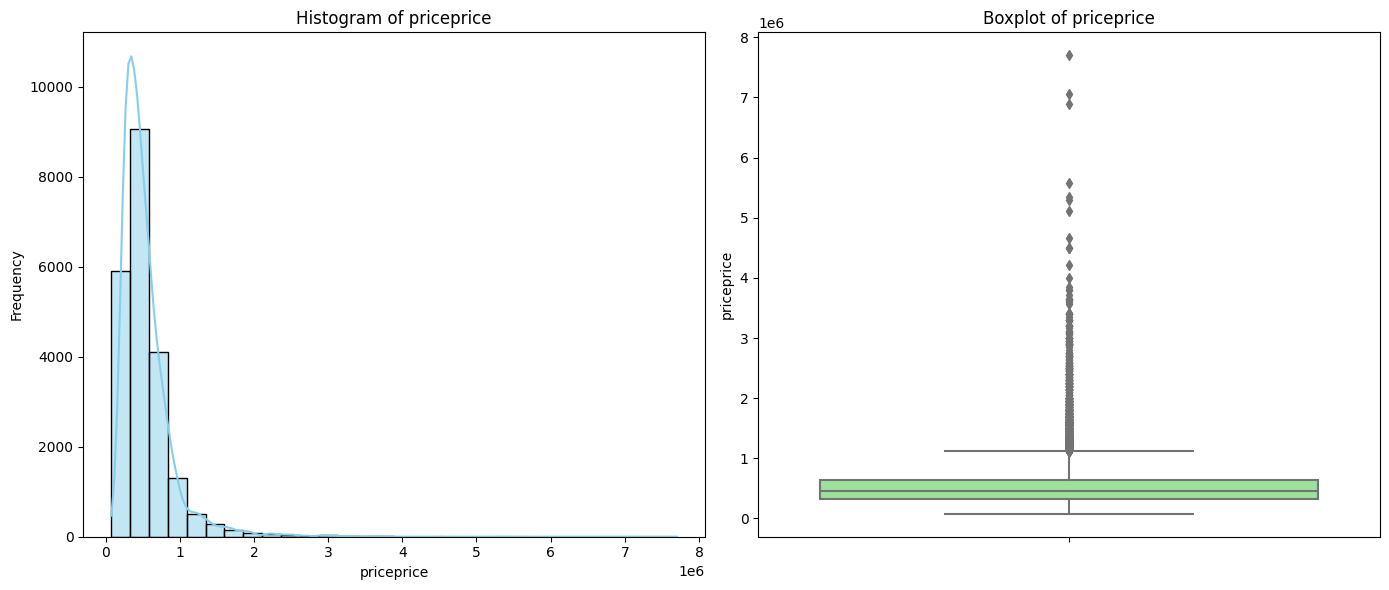

In [56]:
plot_histogram_boxplot(kcdf, "priceprice")  


/Users/rahulgeorge/Desktop/Coriander_heatmap/pair_exercise/EDA-RealEstate-Data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


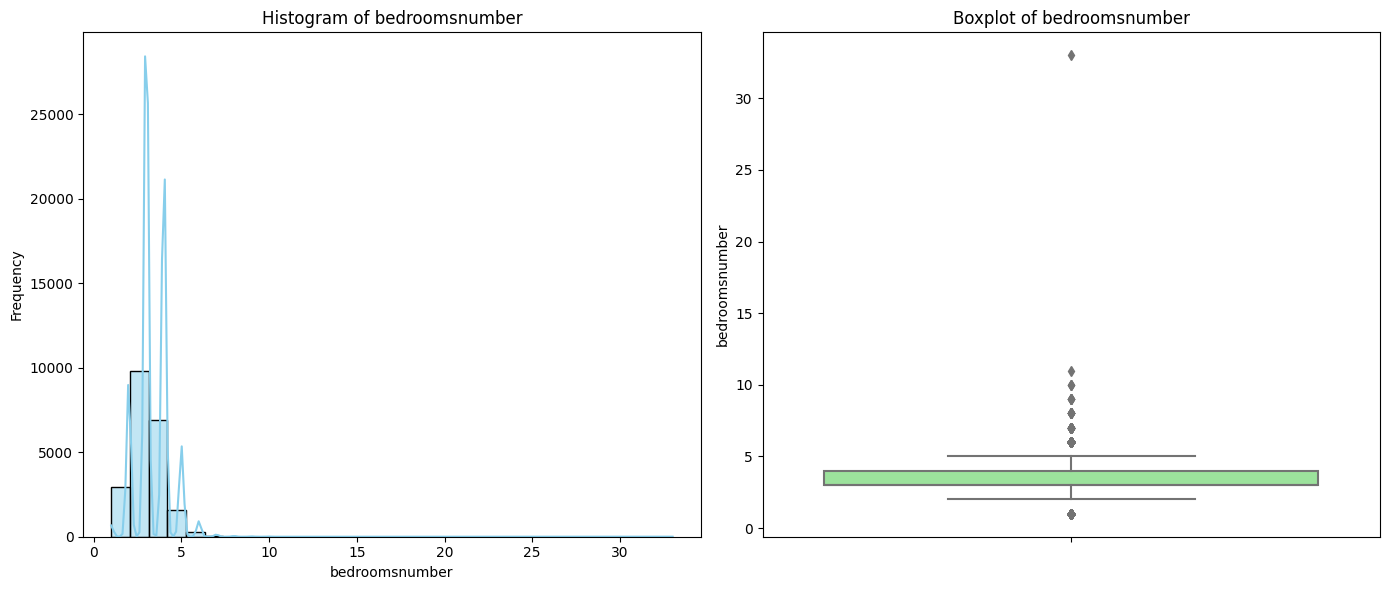

In [58]:
plot_histogram_boxplot(kcdf, "bedroomsnumber")  

/Users/rahulgeorge/Desktop/Coriander_heatmap/pair_exercise/EDA-RealEstate-Data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


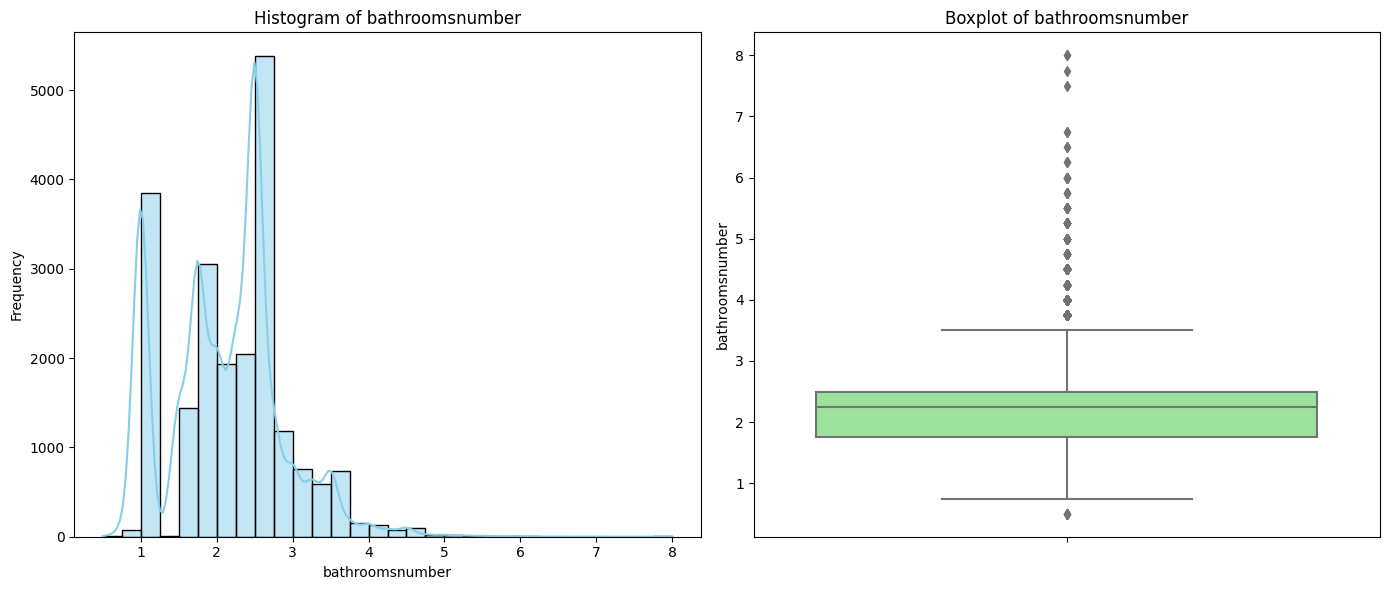

In [59]:
plot_histogram_boxplot(kcdf, "bathroomsnumber")  

In [ ]:
plot_histogram_boxplot(kcdf, "bathroomsnumber") 